### 전국 신규 민간 아파트 분양가격 동향

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import re
from plotnine import *

In [3]:
%pwd

'c:\\song_dev\\zalesiaML_study\\apt_sales'

In [4]:
#data 폴더 아래 다운로드
%ls data

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 8472-E005

 c:\song_dev\zalesiaML_study\apt_sales\data 디렉터리

2019-04-06  오후 07:58    <DIR>          .
2019-04-06  오후 07:58    <DIR>          ..
2019-04-06  오후 07:56           108,525 전국_평균_분양가격_2018.7월_.csv
2019-04-06  오후 07:58             4,528 지역별_3.3㎡당_평균_분양가격_천원__15.09월.csv
               2개 파일             113,053 바이트
               2개 디렉터리  85,945,737,216 바이트 남음


In [5]:
pre_sale = pd.read_csv('data/전국_평균_분양가격_2018.7월_.csv', encoding='euc-kr',engine='python' )

In [6]:
pre_sale.shape

(2890, 5)

In [7]:
pre_sale.head()

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879


In [8]:
pre_sale.tail()

,지역명,규모구분,연도,월,분양가격(㎡)
2885,제주,전체,2018,7,3334
2886,제주,전용면적 60㎡이하,2018,7,NaN
2887,제주,전용면적 60㎡초과 85㎡이하,2018,7,3356
2888,제주,전용면적 85㎡초과 102㎡이하,2018,7,3226
2889,제주,전용면적 102㎡초과,2018,7,2990


In [9]:
pre_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2890 entries, 0 to 2889
Data columns (total 5 columns):
지역명        2890 non-null object
규모구분       2890 non-null object
연도         2890 non-null int64
월          2890 non-null int64
분양가격(㎡)    2750 non-null object
dtypes: int64(2), object(3)
memory usage: 113.0+ KB


In [10]:
pre_sale.dtypes

지역명        object
규모구분       object
연도          int64
월           int64
분양가격(㎡)    object
dtype: object

In [11]:
pre_sale.isnull().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    140
dtype: int64

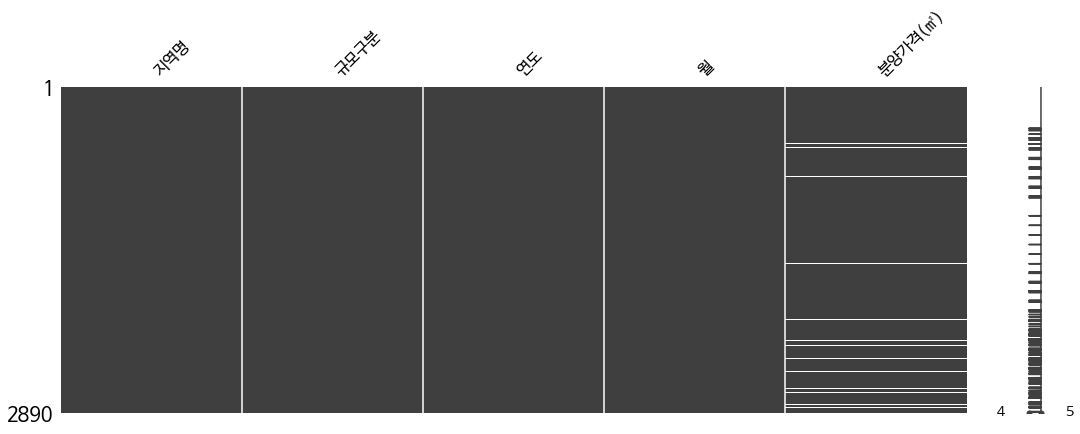

In [12]:
import missingno as msno
msno.matrix(pre_sale, figsize=(18,6))
#하얀색 라인이 결측지임.

In [13]:
#연도와 월은 카테고리 형태의 데이터임으로 인트에서 스트링으로 변경함.
pre_sale['연도'] = pre_sale['연도'].astype(str)
pre_sale['월'] = pre_sale['월'].astype(str)


In [14]:
pre_sale_price = pre_sale['분양가격(㎡)']

In [15]:
pre_sale.head()

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879


In [16]:
#분양가격의 타입을 숫자로 변환
pre_sale['분양가격'] = pd.to_numeric(pre_sale_price, errors='coerce')
#평당 분당가격은?
pre_sale['평당분양가격'] = pre_sale['분양가격'] * 3.3

In [17]:
pre_sale.head()

,지역명,규모구분,연도,월,분양가격(㎡),분양가격,평당분양가격
0,서울,전체,2015,10,5841,5841.0,19275.3
1,서울,전용면적 60㎡이하,2015,10,5652,5652.0,18651.6
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882,5882.0,19410.6
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721,5721.0,18879.3
4,서울,전용면적 102㎡초과,2015,10,5879,5879.0,19400.7


In [18]:
pre_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2890 entries, 0 to 2889
Data columns (total 7 columns):
지역명        2890 non-null object
규모구분       2890 non-null object
연도         2890 non-null object
월          2890 non-null object
분양가격(㎡)    2750 non-null object
분양가격       2658 non-null float64
평당분양가격     2658 non-null float64
dtypes: float64(2), object(5)
memory usage: 158.1+ KB


In [19]:
pre_sale.dtypes

지역명         object
규모구분        object
연도          object
월           object
분양가격(㎡)     object
분양가격       float64
평당분양가격     float64
dtype: object

In [20]:
#결측치가 늘어남. 공백이나 이런것들이 결측치로 인지 하였다가 숫자형 데이터로 변환되면석 공백이 널이 되면서 증가함.
pre_sale.isnull().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    140
분양가격       232
평당분양가격     232
dtype: int64

In [21]:
pre_sale.describe()

,분양가격,평당분양가격
count,2658.000000,2658.000000
mean,3063.297216,10108.880813
std,1112.743769,3672.054436
min,1868.000000,6164.400000
25%,2348.000000,7748.400000
50%,2743.000000,9051.900000
75%,3293.750000,10869.375000
max,8098.000000,26723.400000


In [22]:
#object 타입도 포함
pre_sale.describe(include='all')

,지역명,규모구분,연도,월,분양가격(㎡),분양가격,평당분양가격
count,2890,2890,2890,2890,2750,2658.000000,2658.000000
unique,17,5,4,12,1305,NaN,NaN
top,대구,전체,2017,11,2221,NaN,NaN
freq,170,578,1020,255,17,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,3063.297216,10108.880813
std,NaN,NaN,NaN,NaN,NaN,1112.743769,3672.054436
min,NaN,NaN,NaN,NaN,NaN,1868.000000,6164.400000
25%,NaN,NaN,NaN,NaN,NaN,2348.000000,7748.400000
50%,NaN,NaN,NaN,NaN,NaN,2743.000000,9051.900000
75%,NaN,NaN,NaN,NaN,NaN,3293.750000,10869.375000


In [23]:
pre_sale.describe(include=[np.object])

,지역명,규모구분,연도,월,분양가격(㎡)
count,2890,2890,2890,2890,2750
unique,17,5,4,12,1305
top,대구,전체,2017,11,2221
freq,170,578,1020,255,17


In [24]:
#2017년 데이터만 확인
pre_sale_2017 = pre_sale.loc[pre_sale['연도'] == ' 2017']
pre_sale_2017.shape

(0, 7)

In [25]:
pre_sale['규모구분'].value_counts()

전체                   578
전용면적 102㎡초과          578
전용면적 60㎡초과 85㎡이하     578
전용면적 60㎡이하           578
전용면적 85㎡초과 102㎡이하    578
Name: 규모구분, dtype: int64

In [26]:
#group by 하여 count 한 값을 보여줌
pre_sale['지역명'].value_counts()

대구    170
제주    170
세종    170
강원    170
충남    170
광주    170
전북    170
경남    170
대전    170
울산    170
경기    170
전남    170
서울    170
부산    170
인천    170
충북    170
경북    170
Name: 지역명, dtype: int64

## 전국 평균 분양가격
- group by 와 pivot table 활용

In [27]:
#분양 가격으로 피벗팅
pd.options.display.float_format = '{:,.0f}'.format
pre_sale.groupby(pre_sale.연도).describe()

분양가격                                           평당분양가격               \
     count  mean   std   min   25%   50%   75%   max  count   mean   std   
연도                                                                         
2015   243 2,789   977 1,868 2,225 2,516 3,026 7,092    243  9,203 3,224   
2016   984 2,934 1,071 1,900 2,282 2,672 3,148 8,096    984  9,683 3,536   
2017   899 3,140 1,108 1,976 2,365 2,849 3,456 7,887    899 10,360 3,655   
2018   532 3,299 1,196 2,076 2,471 2,914 3,647 8,098    532 10,885 3,947   

                                      
       min   25%   50%    75%    max  
연도                                    
2015 6,164 7,342 8,303  9,984 23,404  
2016 6,270 7,531 8,818 10,390 26,717  
2017 6,521 7,804 9,402 11,405 26,027  
2018 6,851 8,154 9,616 12,036 26,723

In [28]:
#분양 가격으로 피벗팅
pd.options.display.float_format = '{:,.0f}'.format
#describe()의 기본이 숫자형이기 떄문에 숫자 데이터만 보여준다.
pre_sale.groupby(pre_sale.연도).describe().T

연도             2015   2016   2017   2018
분양가격   count    243    984    899    532
       mean   2,789  2,934  3,140  3,299
       std      977  1,071  1,108  1,196
       min    1,868  1,900  1,976  2,076
       25%    2,225  2,282  2,365  2,471
       50%    2,516  2,672  2,849  2,914
       75%    3,026  3,148  3,456  3,647
       max    7,092  8,096  7,887  8,098
평당분양가격 count    243    984    899    532
       mean   9,203  9,683 10,360 10,885
       std    3,224  3,536  3,655  3,947
       min    6,164  6,270  6,521  6,851
       25%    7,342  7,531  7,804  8,154
       50%    8,303  8,818  9,402  9,616
       75%    9,984 10,390 11,405 12,036
       max   23,404 26,717 26,027 26,723

In [29]:
#분양 가격으로 피벗팅
pd.options.display.float_format = '{:,.0f}'.format
#describe()의 기본이 숫자형이기 떄문에 숫자 데이터만 보여준다.
pre_sale.groupby(pre_sale.연도).describe(include=[np.object]).T

연도                    2015         2016         2017              2018
지역명     count          255         1020         1020               595
        unique          17           17           17                17
        top             제주           인천           인천                강원
        freq            15           60           60                35
규모구분    count          255         1020         1020               595
        unique           5            5            5                 5
        top     전용면적 60㎡이하  전용면적 102㎡초과  전용면적 102㎡초과  전용면적 60㎡초과 85㎡이하
        freq            51          204          204               119
월       count          255         1020         1020               595
        unique           3           12           12                 7
        top             12            9            9                 6
        freq            85           85           85                85
분양가격(㎡) count          255          988          975               532
        unique         180          590          607               317
        top                        2663         2221              3174
        freq            12           10           12                 8

## 규모별 전국 평균 분양가격

In [30]:
pre_sale.pivot_table?

Signature: pre_sale.pivot_table(values=None, index=None, columns=None, aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All')
Docstring:
Create a spreadsheet-style pivot table as a DataFrame. The levels in
the pivot table will be stored in MultiIndex objects (hierarchical
indexes) on the index and columns of the result DataFrame.

Parameters
----------
values : column to aggregate, optional
index : column, Grouper, array, or list of the previous
    If an array is passed, it must be the same length as the data. The
    list can contain any of the other types (except list).
    Keys to group by on the pivot table index.  If an array is passed,
    it is being used as the same manner as column values.
columns : column, Grouper, array, or list of the previous
    If an array is passed, it must be the same length as the data. The
    list can contain any of the other types (except list).
    Keys to group by on the pivot table column.  If an array is passed,
    i

In [31]:
#기본값은 평균 순서는 values, index, columns 순서가 됨.
pre_sale.pivot_table('평당분양가격','규모구분','연도')

연도,2015,2016,2017,2018
규모구분,,,,
전용면적 102㎡초과,"9,837","10,389","11,334","11,235"
전용면적 60㎡이하,"8,952","9,399","10,246","10,912"
전용면적 60㎡초과 85㎡이하,"8,892","9,296","9,825","10,464"
전용면적 85㎡초과 102㎡이하,"9,519","10,122","10,540","11,483"
전체,"8,893","9,293","9,901","10,563"


## 전국 분양가 변동금액

In [32]:
region_year_all = pre_sale.loc[pre_sale['규모구분'] == '전체']
#reset_index는 위에서 피벗을 했을때 컬럼의 로우가 두개가 생성되지만 reset_index를 통해서 위에 헤더를 정리함.
#컬럼의 로우를 하나로 만들 때 사용된다.
region_year = region_year_all.pivot_table('평당분양가격','지역명','연도').reset_index()
region_year

연도,지역명,2015,2016,2017,2018
0,강원,"7,160","7,011","7,127","7,641"
1,경기,"10,377","11,220","11,850","12,881"
2,경남,"7,586","7,848","8,120","8,894"
3,경북,"7,171","7,361","7,795","8,342"
4,광주,"8,052","8,899","9,464","9,638"
5,대구,"9,232","10,310","11,456","11,737"
6,대전,"8,098","8,502","9,045","9,604"
7,부산,"10,307","10,430","11,578","12,756"
8,서울,"19,725","20,663","21,376","22,329"
9,세종,"8,750","8,860","9,135","10,375"


In [33]:
region_year['변동액'] = (region_year['2018'] - region_year['2015']).astype(int)
max_delta_price = np.max(region_year['변동액'])*1000
min_delta_price = np.min(region_year['변동액'])*1000
mean_delta_price = np.mean(region_year['변동액'])*1000

print('2015년부터 2018년까지 분양가 상승이며, 가장 큰 지역은 제주, 상승액은 {:,.0f}원'.format(max_delta_price))

print('상승액이 가장 작은 지역은 울산 평당, {:,.0f}원'.format(min_delta_price))

print('전국 평균 변동액은 {:,.0f}원'.format(mean_delta_price))

region_year

2015년부터 2018년까지 분양가 상승이며, 가장 큰 지역은 제주, 상승액은 5,087,000원
상승액이 가장 작은 지역은 울산 평당, 369,000원
전국 평균 변동액은 1,669,588원


연도,지역명,2015,2016,2017,2018,변동액
0,강원,"7,160","7,011","7,127","7,641",481
1,경기,"10,377","11,220","11,850","12,881",2503
2,경남,"7,586","7,848","8,120","8,894",1308
3,경북,"7,171","7,361","7,795","8,342",1171
4,광주,"8,052","8,899","9,464","9,638",1585
5,대구,"9,232","10,310","11,456","11,737",2504
6,대전,"8,098","8,502","9,045","9,604",1506
7,부산,"10,307","10,430","11,578","12,756",2449
8,서울,"19,725","20,663","21,376","22,329",2603
9,세종,"8,750","8,860","9,135","10,375",1624


## 시각화

## 연도별 변동 그래프

C:\ProgramData\Anaconda3\lib\site-packages\plotnine\layer.py:449: UserWarning: geom_bar : Removed 17 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


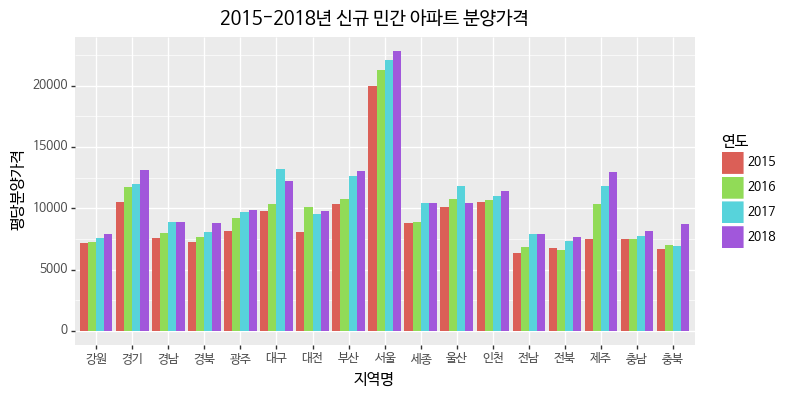

<ggplot: (193904940748)>

In [34]:
(ggplot(region_year_all, aes(x='지역명', y='평당분양가격', fill='연도'))
 + geom_bar(stat='identity', position='dodge')
 + ggtitle('2015-2018년 신규 민간 아파트 분양가격')
 + theme(text=element_text(family='NanumBarunGothic'),
         figure_size=(8, 4))
)
##변동액읩 범위를 그래프 막대 그래프로 비교 할 수 있다.

## 지역별 평당 분양가격 합계

In [35]:
pre_sale.pivot_table('평당분양가격','규모구분','지역명')

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
규모구분,,,,,,,,,,,,,,,,,
전용면적 102㎡초과,"7,899","13,647","9,226","8,616","10,296","12,334","14,282","12,590","22,058","9,292","9,974","13,836","7,568","7,842","10,416","8,478","7,933"
전용면적 60㎡이하,"7,195","12,385","8,343","7,661","8,518","11,285","8,798","10,707","22,046","9,107","8,965","10,870","6,991","7,232","14,700","7,782","6,969"
전용면적 60㎡초과 85㎡이하,"7,228","11,691","8,110","7,690","9,176","10,931","8,807","11,191","20,781","9,272","10,641","10,748","6,968","6,891","9,943","7,504","7,044"
전용면적 85㎡초과 102㎡이하,"7,686","12,130","9,822","8,776","9,296","9,589","9,037","11,039","23,754","9,245","8,861","11,267","7,882","7,770","10,739","9,090","8,171"
전체,"7,197","11,706","8,137","7,696","9,167","10,897","8,880","11,295","21,169","9,263","10,619","10,739","6,982","6,902","10,253","7,494","6,994"


## 규모별

C:\ProgramData\Anaconda3\lib\site-packages\plotnine\layer.py:449: UserWarning: geom_bar : Removed 232 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


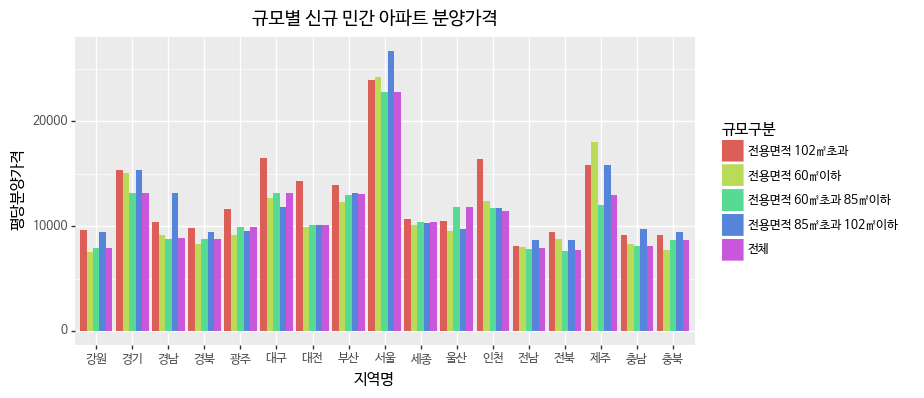

<ggplot: (193904957781)>

In [36]:
# 서울의 경우 전용면적 85㎡초과 102㎡이하가 분양가격이 가장 비싸게 나옵니다.
(ggplot(pre_sale, aes(x='지역명', y='평당분양가격', fill='규모구분'))
 + geom_bar(stat='identity', position='dodge')
 + ggtitle('규모별 신규 민간 아파트 분양가격')
 + theme(text=element_text(family='NanumBarunGothic'),
         figure_size=(8, 4))
)

In [37]:
#울산 지역은 전용면적 60-85가 분양가가 더 높음.

C:\ProgramData\Anaconda3\lib\site-packages\plotnine\layer.py:449: UserWarning: geom_bar : Removed 232 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


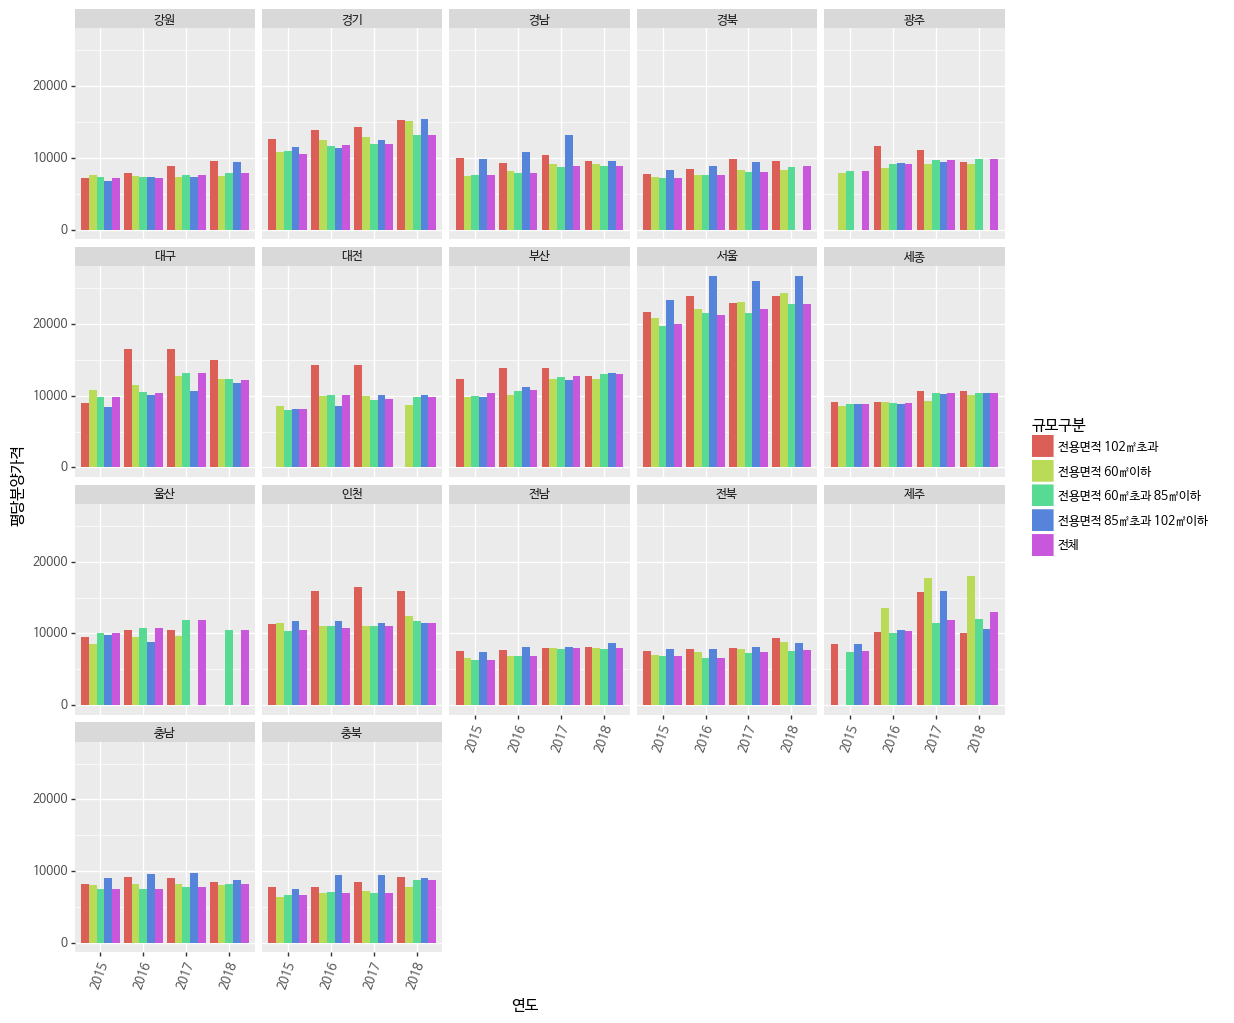

<ggplot: (193905184639)>

In [38]:
# 위에 그린 그래프를 지역별로 나눠 봄 facet_wrap
(ggplot(pre_sale)
 + aes(x='연도', y='평당분양가격', fill='규모구분')
 + geom_bar(stat='identity', position='dodge')
 + facet_wrap('지역명')
 + theme(text=element_text(family='NanumBarunGothic'),
         axis_text_x=element_text(rotation=70),
         figure_size=(12, 12))
)

C:\ProgramData\Anaconda3\lib\site-packages\plotnine\layer.py:360: UserWarning: stat_boxplot : Removed 232 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


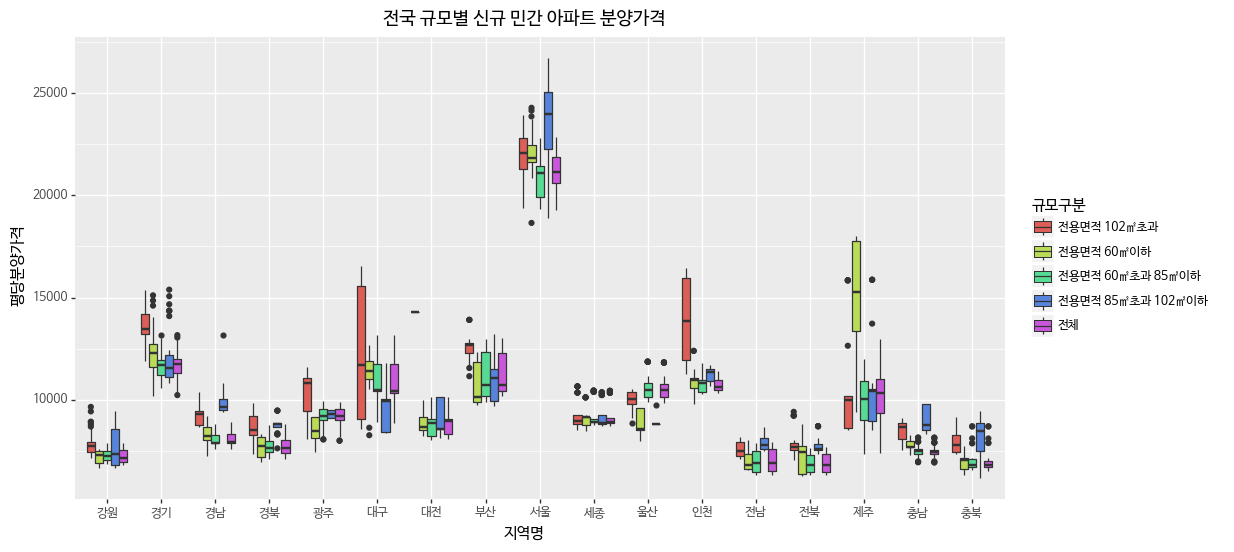

<ggplot: (-9223371842949818592)>

In [39]:
# 박스플롯 4분의 수
(ggplot(pre_sale, aes(x='지역명', y='평당분양가격', fill='규모구분'))
 + geom_boxplot()
 + ggtitle('전국 규모별 신규 민간 아파트 분양가격')
 + theme(text=element_text(family='NanumBarunGothic'),
         figure_size=(12, 6))
)

# 대구 102 분양가읩 변동액이 크고, 제주는 60이하가 분양가 변동액이 크다.

C:\ProgramData\Anaconda3\lib\site-packages\plotnine\layer.py:360: UserWarning: stat_boxplot : Removed 5 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


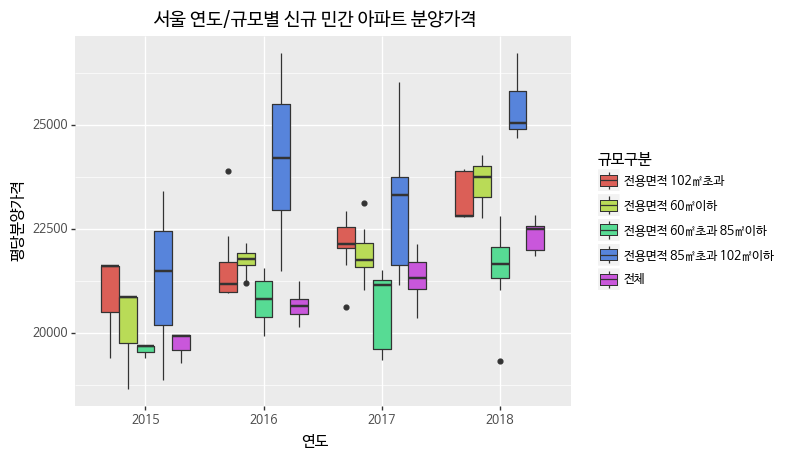

<ggplot: (-9223371842948728488)>

In [40]:
pre_sale_seoul = pre_sale.loc[pre_sale['지역명']=='서울']
(ggplot(pre_sale_seoul)
 + aes(x='연도', y='평당분양가격', fill='규모구분')
 + ggtitle('서울 연도/규모별 신규 민간 아파트 분양가격')
 + geom_boxplot()
 + theme(text=element_text(family='NanumBarunGothic'))
)

In [41]:
# 서울 85-102이 가장 인기가 좋음.

C:\ProgramData\Anaconda3\lib\site-packages\plotnine\layer.py:360: UserWarning: stat_boxplot : Removed 25 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


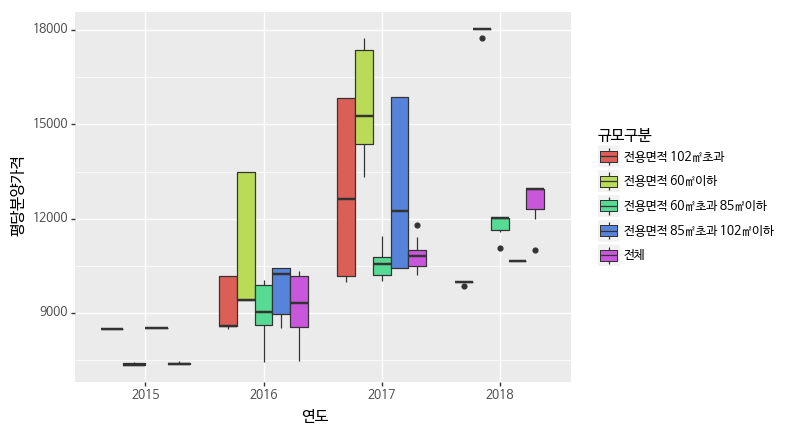

<ggplot: (-9223371842948742880)>

In [42]:
# 2015년에서 2018년까지 분양가 차이가 가장 컸던 제주
(ggplot(pre_sale.loc[pre_sale['지역명']=='제주'])
 + aes(x='연도', y='평당분양가격', fill='규모구분')
 + geom_boxplot()
 + theme(text=element_text(family='NanumBarunGothic'))
)

#값이 표기가 안되어있는 2018년도에는 변동액이 거의 없었음.

C:\ProgramData\Anaconda3\lib\site-packages\plotnine\layer.py:360: UserWarning: stat_boxplot : Removed 41 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


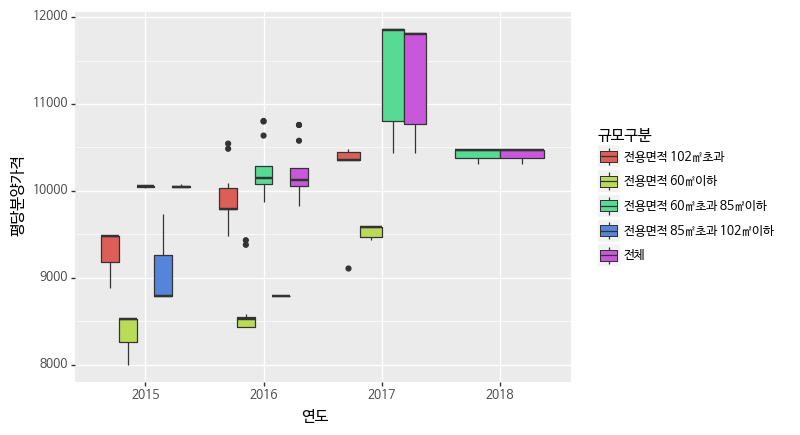

<ggplot: (-9223371842948753969)>

In [43]:
# 2015년에서 2018년까지 분양가 차이가 가장 작았던 울산
# 실제로는 분양가 차이가 적은 것이 아니라 결측치로 인해 분양가 차이가 적게 보였습니다.
(ggplot(pre_sale.loc[pre_sale['지역명']=='울산'])
 + aes(x='연도', y='평당분양가격', fill='규모구분')
 + geom_boxplot()
 + theme(text=element_text(family='NanumBarunGothic'))
)

# 2018년도에 결측치가 많아서. 박스의 형태가 나오지 않음.

## Tidy data

In [44]:
### Tidy data 만들기 -> 데이터를 맞춰주는 작업을 tidy data라고 부름.
# 데이터를 조작하거나 시각화 하기 위한 작업

In [45]:
df = pd.read_csv('data/지역별_3.3㎡당_평균_분양가격_천원__15.09월.csv', encoding = 'euc-kr', \
                 engine='python',skiprows=1, header=0)
df.shape

(23, 27)

In [46]:
df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,구분,NaN,2013년,2014년,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,(단위: 천원/3.3㎡)
1,시도,시군구,12월,1월,2월,3월,4월,5월,6월,7월,...,3월,4월,5월,6월,7월,8월,9월,전월비,전년말비,전년동월비
2,전국,NaN,"8,059","8,130","8,195","8,204","8,289","8,358","8,344","8,333",...,"8,563","8,613","8,624","8,627","8,643","8,678","8,665",-13,82,207
3,서울,NaN,"18,189","17,925","17,925","18,016","18,098","19,446","18,867","18,742",...,"19,415","18,842","18,367","18,374","18,152","18,443","17,969",-474,"-2,300","-1,434"
4,6대광역시,부산,"8,111","8,111","9,078","8,965","9,402","9,501","9,453","9,457",...,"9,279","9,327","9,345","9,515","9,559","9,581","9,608",1,430,477
5,NaN,대구,"8,080","8,080","8,077","8,101","8,267","8,274","8,360","8,360",...,"8,441","8,446","8,568","8,542","8,542","8,795","8,863",27,400,350
6,NaN,인천,"10,204","10,204","10,408","10,408","10,000","9,844","10,058","9,974",...,"9,876","9,938","10,551","10,443","10,443","10,449","10,450",-162,-150,-131
7,NaN,광주,"6,098","7,326","7,611","7,346","7,346","7,523","7,659","7,612",...,"7,861","7,914","7,877","7,881","8,089","8,231","8,083",-148,334,281
8,NaN,대전,"8,321","8,321","8,321","8,341","8,341","8,341","8,333","8,333",...,"8,067","8,145","8,272","8,079","8,079","8,079","7,917",68,610,414
9,NaN,울산,"8,090","8,090","8,090","8,153","8,153","8,153","8,153","8,153",...,"8,629","9,380","9,192","9,190","9,190","9,215","9,215",0,324,722


In [47]:
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,구분,NaN,2013년,2014년,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,(단위: 천원/3.3㎡)
1,시도,시군구,12월,1월,2월,3월,4월,5월,6월,7월,...,3월,4월,5월,6월,7월,8월,9월,전월비,전년말비,전년동월비
2,전국,NaN,"8,059","8,130","8,195","8,204","8,289","8,358","8,344","8,333",...,"8,563","8,613","8,624","8,627","8,643","8,678","8,665",-13,82,207
3,서울,NaN,"18,189","17,925","17,925","18,016","18,098","19,446","18,867","18,742",...,"19,415","18,842","18,367","18,374","18,152","18,443","17,969",-474,"-2,300","-1,434"
4,6대광역시,부산,"8,111","8,111","9,078","8,965","9,402","9,501","9,453","9,457",...,"9,279","9,327","9,345","9,515","9,559","9,581","9,608",1,430,477


In [48]:
year = df.iloc[0]
month = df.iloc[1]

In [49]:
year

Unnamed: 0                구분
Unnamed: 1               NaN
Unnamed: 2             2013년
Unnamed: 3             2014년
Unnamed: 4               NaN
Unnamed: 5               NaN
Unnamed: 6               NaN
Unnamed: 7               NaN
Unnamed: 8               NaN
Unnamed: 9               NaN
Unnamed: 10              NaN
Unnamed: 11              NaN
Unnamed: 12              NaN
Unnamed: 13              NaN
Unnamed: 14              NaN
Unnamed: 15            2015년
Unnamed: 16              NaN
Unnamed: 17              NaN
Unnamed: 18              NaN
Unnamed: 19              NaN
Unnamed: 20              NaN
Unnamed: 21              NaN
Unnamed: 22              NaN
Unnamed: 23              NaN
Unnamed: 24              NaN
Unnamed: 25              NaN
Unnamed: 26    (단위: 천원/3.3㎡)
Name: 0, dtype: object

In [50]:
# 컬럼을 새로 만들어 주기 위해 0번째와 1번째 행을 합쳐준다.
# 4번부터 14번까지 14년 ~ 구간채움 
for i, y in enumerate(year):
    if i > 2 and i < 15:
        year[i] = ' '.join(['2014년', month[i]])
    elif i >= 15:
        year[i] = ' '.join(['2015년', month[i]])
    elif i == 2 :
        year[i] = ' '.join([year[i], month[i]])
    elif i == 1:
        year[i] = '시군구'
        
print(year)

Unnamed: 0              구분
Unnamed: 1             시군구
Unnamed: 2       2013년 12월
Unnamed: 3        2014년 1월
Unnamed: 4        2014년 2월
Unnamed: 5        2014년 3월
Unnamed: 6        2014년 4월
Unnamed: 7        2014년 5월
Unnamed: 8        2014년 6월
Unnamed: 9        2014년 7월
Unnamed: 10       2014년 8월
Unnamed: 11       2014년 9월
Unnamed: 12      2014년 10월
Unnamed: 13      2014년 11월
Unnamed: 14      2014년 12월
Unnamed: 15       2015년 1월
Unnamed: 16       2015년 2월
Unnamed: 17       2015년 3월
Unnamed: 18       2015년 4월
Unnamed: 19       2015년 5월
Unnamed: 20       2015년 6월
Unnamed: 21       2015년 7월
Unnamed: 22       2015년 8월
Unnamed: 23       2015년 9월
Unnamed: 24      2015년 전월비
Unnamed: 25     2015년 전년말비
Unnamed: 26    2015년 전년동월비
Name: 0, dtype: object


In [51]:
#컬럼에 다시 넣어줌
df.columns = year

In [52]:
df

,구분,시군구,2013년 12월,2014년 1월,2014년 2월,2014년 3월,2014년 4월,2014년 5월,2014년 6월,2014년 7월,...,2015년 3월,2015년 4월,2015년 5월,2015년 6월,2015년 7월,2015년 8월,2015년 9월,2015년 전월비,2015년 전년말비,2015년 전년동월비
0,구분,시군구,2013년 12월,2014년 1월,2014년 2월,2014년 3월,2014년 4월,2014년 5월,2014년 6월,2014년 7월,...,2015년 3월,2015년 4월,2015년 5월,2015년 6월,2015년 7월,2015년 8월,2015년 9월,2015년 전월비,2015년 전년말비,2015년 전년동월비
1,시도,시군구,12월,1월,2월,3월,4월,5월,6월,7월,...,3월,4월,5월,6월,7월,8월,9월,전월비,전년말비,전년동월비
2,전국,NaN,"8,059","8,130","8,195","8,204","8,289","8,358","8,344","8,333",...,"8,563","8,613","8,624","8,627","8,643","8,678","8,665",-13,82,207
3,서울,NaN,"18,189","17,925","17,925","18,016","18,098","19,446","18,867","18,742",...,"19,415","18,842","18,367","18,374","18,152","18,443","17,969",-474,"-2,300","-1,434"
4,6대광역시,부산,"8,111","8,111","9,078","8,965","9,402","9,501","9,453","9,457",...,"9,279","9,327","9,345","9,515","9,559","9,581","9,608",1,430,477
5,NaN,대구,"8,080","8,080","8,077","8,101","8,267","8,274","8,360","8,360",...,"8,441","8,446","8,568","8,542","8,542","8,795","8,863",27,400,350
6,NaN,인천,"10,204","10,204","10,408","10,408","10,000","9,844","10,058","9,974",...,"9,876","9,938","10,551","10,443","10,443","10,449","10,450",-162,-150,-131
7,NaN,광주,"6,098","7,326","7,611","7,346","7,346","7,523","7,659","7,612",...,"7,861","7,914","7,877","7,881","8,089","8,231","8,083",-148,334,281
8,NaN,대전,"8,321","8,321","8,321","8,341","8,341","8,341","8,333","8,333",...,"8,067","8,145","8,272","8,079","8,079","8,079","7,917",68,610,414
9,NaN,울산,"8,090","8,090","8,090","8,153","8,153","8,153","8,153","8,153",...,"8,629","9,380","9,192","9,190","9,190","9,215","9,215",0,324,722


In [53]:
df = df.drop(df.index[[0,1]])
df

,구분,시군구,2013년 12월,2014년 1월,2014년 2월,2014년 3월,2014년 4월,2014년 5월,2014년 6월,2014년 7월,...,2015년 3월,2015년 4월,2015년 5월,2015년 6월,2015년 7월,2015년 8월,2015년 9월,2015년 전월비,2015년 전년말비,2015년 전년동월비
2,전국,NaN,"8,059","8,130","8,195","8,204","8,289","8,358","8,344","8,333",...,"8,563","8,613","8,624","8,627","8,643","8,678","8,665",-13,82,207
3,서울,NaN,"18,189","17,925","17,925","18,016","18,098","19,446","18,867","18,742",...,"19,415","18,842","18,367","18,374","18,152","18,443","17,969",-474,"-2,300","-1,434"
4,6대광역시,부산,"8,111","8,111","9,078","8,965","9,402","9,501","9,453","9,457",...,"9,279","9,327","9,345","9,515","9,559","9,581","9,608",1,430,477
5,NaN,대구,"8,080","8,080","8,077","8,101","8,267","8,274","8,360","8,360",...,"8,441","8,446","8,568","8,542","8,542","8,795","8,863",27,400,350
6,NaN,인천,"10,204","10,204","10,408","10,408","10,000","9,844","10,058","9,974",...,"9,876","9,938","10,551","10,443","10,443","10,449","10,450",-162,-150,-131
7,NaN,광주,"6,098","7,326","7,611","7,346","7,346","7,523","7,659","7,612",...,"7,861","7,914","7,877","7,881","8,089","8,231","8,083",-148,334,281
8,NaN,대전,"8,321","8,321","8,321","8,341","8,341","8,341","8,333","8,333",...,"8,067","8,145","8,272","8,079","8,079","8,079","7,917",68,610,414
9,NaN,울산,"8,090","8,090","8,090","8,153","8,153","8,153","8,153","8,153",...,"8,629","9,380","9,192","9,190","9,190","9,215","9,215",0,324,722
10,NaN,NaN,"8,151","8,355","8,597","8,552","8,585","8,606","8,669","8,648",...,"8,692","8,858","8,967","8,942","8,984","9,058","9,023",-36,325,352
11,경기,NaN,"10,855","10,855","10,791","10,784","10,876","10,646","10,266","10,124",...,"10,469","10,684","10,685","10,573","10,518","10,573","10,341",-232,-38,-160


In [54]:
df['구분'] = df['구분'].fillna('')
df['시군구'] = df['시군구'].fillna('')
df['지역'] = df['구분'] + df['시군구']

In [55]:
df['지역']

2          전국
3          서울
4     6대광역시부산
5          대구
6          인천
7          광주
8          대전
9          울산
10           
11         경기
12        수도권
13         세종
14       지방강원
15         충북
16         충남
17         전북
18         전남
19         경북
20         경남
21         제주
22           
Name: 지역, dtype: object

In [56]:
melt_columns = df.columns.copy()
melt_columns

Index(['구분', '시군구', '2013년 12월', '2014년 1월', '2014년 2월', '2014년 3월',
       '2014년 4월', '2014년 5월', '2014년 6월', '2014년 7월', '2014년 8월', '2014년 9월',
       '2014년 10월', '2014년 11월', '2014년 12월', '2015년 1월', '2015년 2월',
       '2015년 3월', '2015년 4월', '2015년 5월', '2015년 6월', '2015년 7월', '2015년 8월',
       '2015년 9월', '2015년 전월비', '2015년 전년말비', '2015년 전년동월비', '지역'],
      dtype='object', name=0)

In [57]:
df_2013_2015 = pd.melt(df, id_vars=['지역'], value_vars=['2013년 12월', '2014년 1월', '2014년 2월', '2014년 3월',
                                                       '2014년 4월', '2014년 5월', '2014년 6월', '2014년 7월', '2014년 8월',
                                                       '2014년 9월', '2014년 10월', '2014년 11월', '2014년 12월', '2015년 1월',
                                                       '2015년 2월', '2015년 3월', '2015년 4월', '2015년 5월', '2015년 6월',
                                                       '2015년 7월', '2015년 8월', '2015년 9월'])


In [59]:
df_2013_2015.head()

,지역,0,value
0,전국,2013년 12월,"8,059"
1,서울,2013년 12월,"18,189"
2,6대광역시부산,2013년 12월,"8,111"
3,대구,2013년 12월,"8,080"
4,인천,2013년 12월,"10,204"


In [60]:
df_2013_2015.columns=['지역','기간','분양가']
df_2013_2015.head()

,지역,기간,분양가
0,전국,2013년 12월,"8,059"
1,서울,2013년 12월,"18,189"
2,6대광역시부산,2013년 12월,"8,111"
3,대구,2013년 12월,"8,080"
4,인천,2013년 12월,"10,204"


In [63]:
df_2013_2015['연도'] = df_2013_2015['기간'].apply(lambda year_month : year_month.split('년')[0])
df_2013_2015['월'] = df_2013_2015['기간'].apply(lambda year_month : re.sub('월', '', year_month.split('년')[1]).strip())
                                            

In [64]:
df_2013_2015.head()

,지역,기간,분양가,연도,월
0,전국,2013년 12월,"8,059",2013,12
1,서울,2013년 12월,"18,189",2013,12
2,6대광역시부산,2013년 12월,"8,111",2013,12
3,대구,2013년 12월,"8,080",2013,12
4,인천,2013년 12월,"10,204",2013,12


## 지역명 강원과 부산을 정리

In [66]:
df_2013_2015['지역'].value_counts()

           44
세종         22
경기         22
지방강원       22
경북         22
수도권        22
전북         22
전남         22
대전         22
대구         22
인천         22
충남         22
충북         22
전국         22
울산         22
광주         22
경남         22
6대광역시부산    22
제주         22
서울         22
Name: 지역, dtype: int64

In [67]:
df_2013_2015['지역'] = df_2013_2015['지역'].apply(lambda x: re.sub('6대광역시부산','부산',x))
df_2013_2015['지역'] = df_2013_2015['지역'].apply(lambda x: re.sub('지방강원','강원',x))
df_2013_2015['지역'].value_counts()


       44
인천     22
경기     22
경북     22
수도권    22
전북     22
전남     22
대전     22
대구     22
서울     22
강원     22
충북     22
전국     22
울산     22
광주     22
경남     22
부산     22
제주     22
세종     22
충남     22
Name: 지역, dtype: int64

In [68]:
df_2013_2015.describe()

,지역,기간,분양가,연도,월
count,462,462,462,462,462
unique,20,22,371,3,12
top,,2014년 10월,"8,067",2014,9
freq,44,21,7,252,42


In [69]:
df_2013_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 5 columns):
지역     462 non-null object
기간     462 non-null object
분양가    462 non-null object
연도     462 non-null object
월      462 non-null object
dtypes: object(5)
memory usage: 18.1+ KB


In [72]:
#연도와 월은 카테고리성 데이터임으로 인트형으로 변환하지 않는다.
df_2013_2015['분양가격'] = df_2013_2015['분양가'].str.replace(',','').astype(int)

In [73]:
df_2013_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 6 columns):
지역      462 non-null object
기간      462 non-null object
분양가     462 non-null object
연도      462 non-null object
월       462 non-null object
분양가격    462 non-null int32
dtypes: int32(1), object(5)
memory usage: 19.9+ KB


## 2013년 12월부터 15년 9월까지 데이터 시각화하기

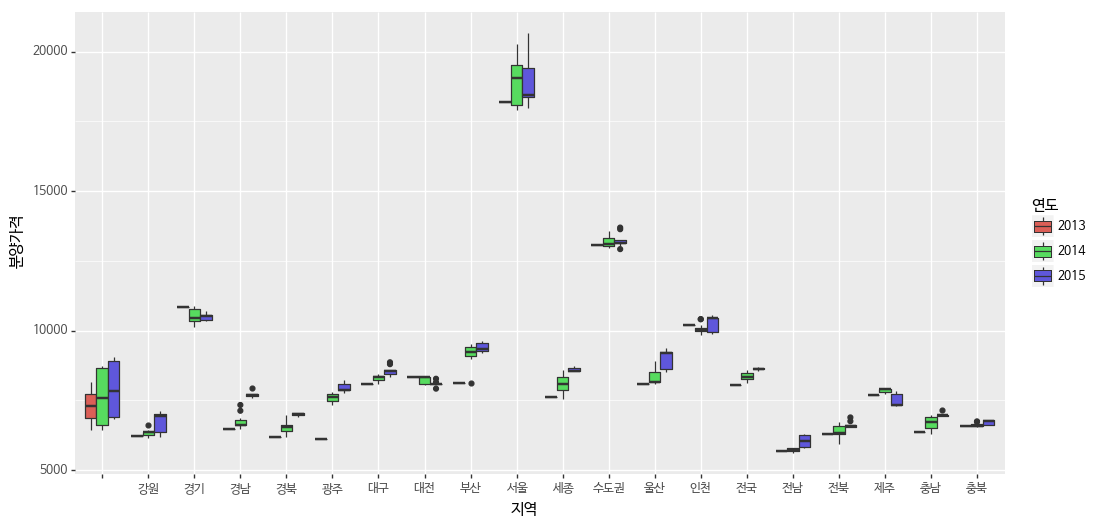

<ggplot: (193907560347)>

In [74]:
(ggplot(df_2013_2015, aes(x='지역',y='분양가격',fill='연도'))
    + geom_boxplot()
    + theme(text=element_text(family='NanumBarunGothic'),
           figure_size = (12,6))
)

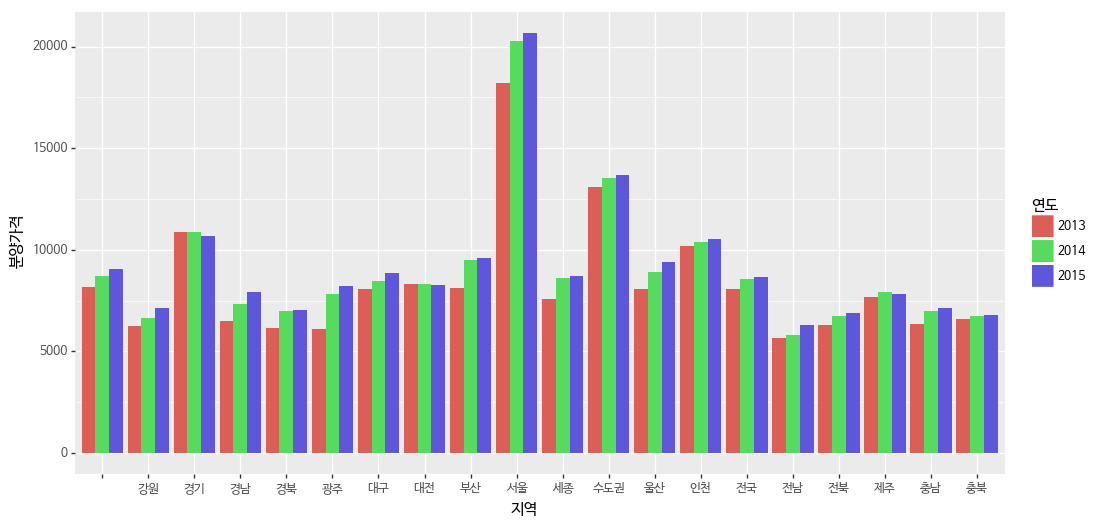

<ggplot: (-9223371842946439999)>

In [75]:
(ggplot(df_2013_2015, aes(x='지역',y='분양가격',fill='연도'))
    + geom_bar(stat='identity', position='dodge')
    + theme(text=element_text(family='NanumBarunGothic'),
           figure_size = (12,6))
)

## 2013년부터 18년 7월까지 데이터를 합치기

In [77]:
df_2015_2018 = pre_sale.loc[pre_sale['규모구분'] == '전체']
print(df_2015_2018.shape)
df_2015_2018.head()

(578, 7)


,지역명,규모구분,연도,월,분양가격(㎡),분양가격,평당분양가격
0,서울,전체,2015,10,5841,"5,841","19,275"
5,인천,전체,2015,10,3163,"3,163","10,438"
10,경기,전체,2015,10,3138,"3,138","10,355"
15,부산,전체,2015,10,3112,"3,112","10,270"
20,대구,전체,2015,10,2682,"2,682","8,851"


In [78]:
df_2013_2015.columns

Index(['지역', '기간', '분양가', '연도', '월', '분양가격'], dtype='object')

In [80]:
df_2013_2015_prepare = df_2013_2015[['지역','연도','월','분양가격']]
df_2013_2015_prepare.head()

,지역,연도,월,분양가격
0,전국,2013,12,8059
1,서울,2013,12,18189
2,부산,2013,12,8111
3,대구,2013,12,8080
4,인천,2013,12,10204


In [86]:
#컬럼명 맞춰주기
df_2013_2015_prepare.columns = ['지역명','연도','월','평당분양가격']
df_2013_2015_prepare.head()

,지역명,연도,월,평당분양가격
0,전국,2013,12,8059
1,서울,2013,12,18189
2,부산,2013,12,8111
3,대구,2013,12,8080
4,인천,2013,12,10204


In [83]:
df_2015_2018.columns

Index(['지역명', '규모구분', '연도', '월', '분양가격(㎡)', '분양가격', '평당분양가격'], dtype='object')

In [84]:
df_2015_2018_prepare = df_2015_2018[['지역명','연도','월','평당분양가격']]
df_2015_2018_prepare.head()

,지역명,연도,월,평당분양가격
0,서울,2015,10,"19,275"
5,인천,2015,10,"10,438"
10,경기,2015,10,"10,355"
15,부산,2015,10,"10,270"
20,대구,2015,10,"8,851"


In [85]:
df_2015_2018_prepare.describe()

,평당분양가격
count,561
mean,"9,729"
std,"3,367"
min,"6,300"
25%,"7,498"
50%,"8,973"
75%,"10,560"
max,"22,833"


In [87]:
#위아래를 붙혀줌
df_2013_2018 = pd.concat([df_2013_2015_prepare, df_2015_2018_prepare])
df_2013_2018.shape

(1040, 4)

In [88]:
df_2013_2018.head()

,지역명,연도,월,평당분양가격
0,전국,2013,12,"8,059"
1,서울,2013,12,"18,189"
2,부산,2013,12,"8,111"
3,대구,2013,12,"8,080"
4,인천,2013,12,"10,204"


In [89]:
df_2013_2018.tail()

,지역명,연도,월,평당분양가격
2865,전북,2018,7,"7,699"
2870,전남,2018,7,"7,778"
2875,경북,2018,7,"8,824"
2880,경남,2018,7,"8,897"
2885,제주,2018,7,"11,002"


In [91]:
df_2013_2015_region = df_2013_2015_prepare['지역명'].unique()
df_2013_2015_region

array(['전국', '서울', '부산', '대구', '인천', '광주', '대전', '울산', '', '경기', '수도권',
       '세종', '강원', '충북', '충남', '전북', '전남', '경북', '경남', '제주'], dtype=object)

In [92]:
df_2015_2018_region = df_2015_2018_prepare['지역명'].unique()
df_2015_2018_region

array(['서울', '인천', '경기', '부산', '대구', '광주', '대전', '울산', '세종', '강원', '충북',
       '충남', '전북', '전남', '경북', '경남', '제주'], dtype=object)

In [93]:
exclude_region = [region for region in df_2013_2015_region if not region in df_2015_2018_region]
exclude_region

['전국', '', '수도권']

In [94]:
df_2013_2018.shape

(1040, 4)

In [95]:
df_2013_2018.loc[df_2013_2018['지역명'].str.match('전국|수도권')].head()

,지역명,연도,월,평당분양가격
0,전국,2013,12,"8,059"
10,수도권,2013,12,"13,083"
21,전국,2014,1,"8,130"
31,수도권,2014,1,"12,995"
42,전국,2014,2,"8,195"


In [98]:
df_2013_2018.drop(df_2013_2018.loc[df_2013_2018['지역명'].str.match('전국|수도권')].index, axis=0, inplace=True)
df_2013_2018.drop(df_2013_2018.loc[df_2013_2018['지역명'] == ''].index, axis=0, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\plotnine\layer.py:449: UserWarning: geom_bar : Removed 17 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


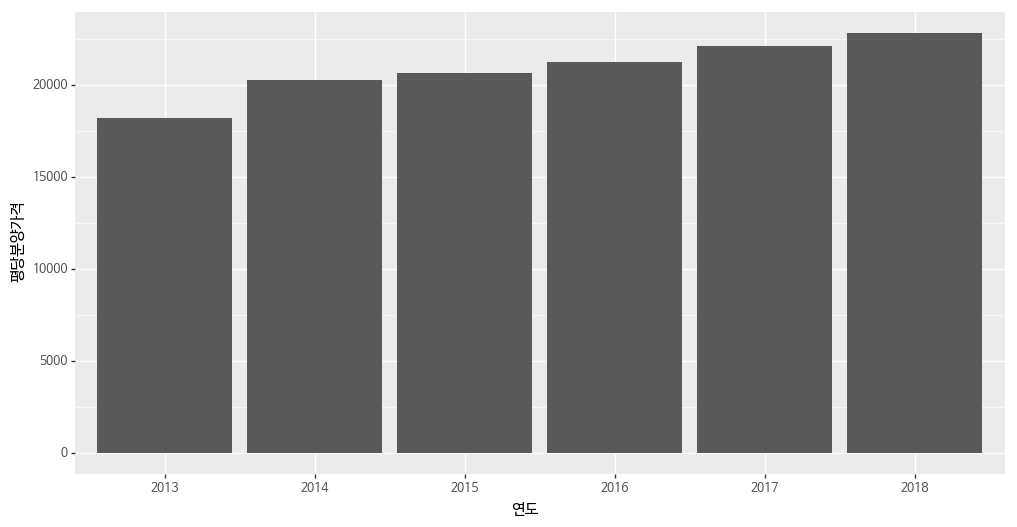

<ggplot: (-9223371842946341958)>

In [100]:
(ggplot(df_2013_2018, aes(x='연도',y='평당분양가격'))
    + geom_bar(stat='identity', position='dodge' )
    + theme(text=element_text(family='NanumBarunGothic'),
           figure_size = (12,6))
)

C:\ProgramData\Anaconda3\lib\site-packages\plotnine\layer.py:449: UserWarning: geom_bar : Removed 17 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


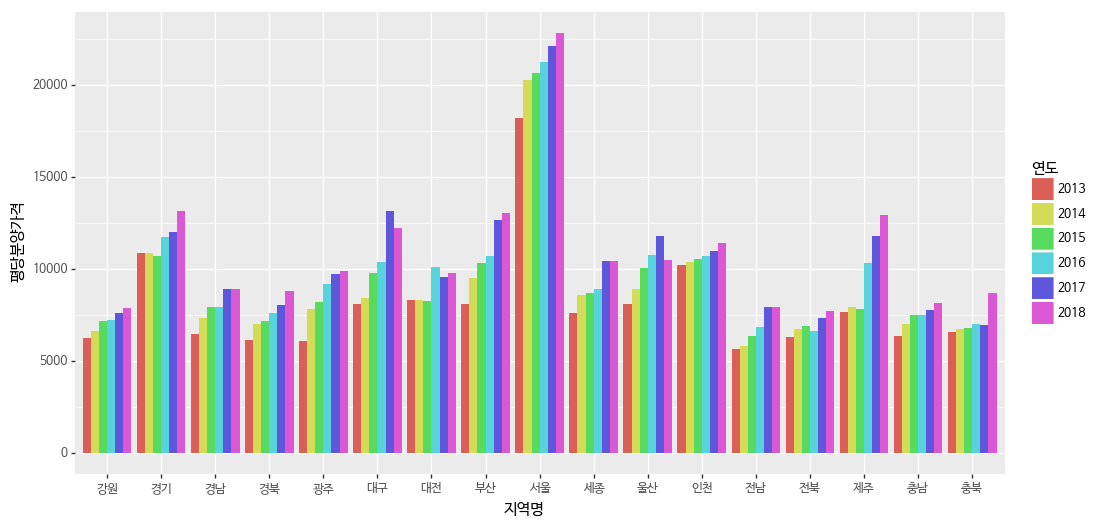

<ggplot: (193908477732)>

In [101]:
(ggplot(df_2013_2018, aes(x='지역명',y='평당분양가격', fill='연도'))
    + geom_bar(stat='identity', position='dodge' )
    + theme(text=element_text(family='NanumBarunGothic'),
           figure_size = (12,6))
)

C:\ProgramData\Anaconda3\lib\site-packages\plotnine\layer.py:360: UserWarning: stat_boxplot : Removed 17 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


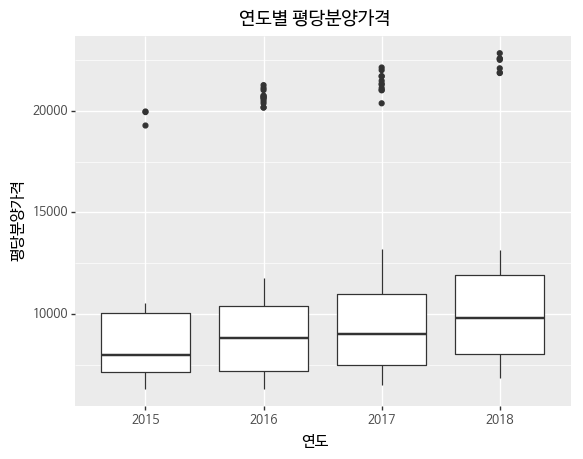

<ggplot: (193908724081)>

In [104]:
(ggplot(df_2015_2018_prepare)
    + aes(x='연도',y='평당분양가격')
    + ggtitle('연도별 평당분양가격')
    + geom_boxplot()
    + theme(text=element_text(family='NanumBarunGothic'))
)

C:\ProgramData\Anaconda3\lib\site-packages\plotnine\layer.py:360: UserWarning: stat_boxplot : Removed 17 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


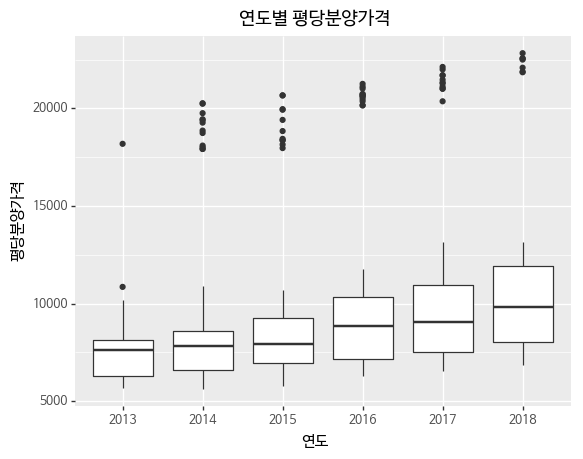

<ggplot: (-9223371842947167982)>

In [106]:
(ggplot(df_2013_2018)
    + aes(x='연도',y='평당분양가격')
    + ggtitle('연도별 평당분양가격')
    + geom_boxplot()
    + theme(text=element_text(family='NanumBarunGothic'))
)

C:\ProgramData\Anaconda3\lib\site-packages\plotnine\layer.py:360: UserWarning: stat_boxplot : Removed 1 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


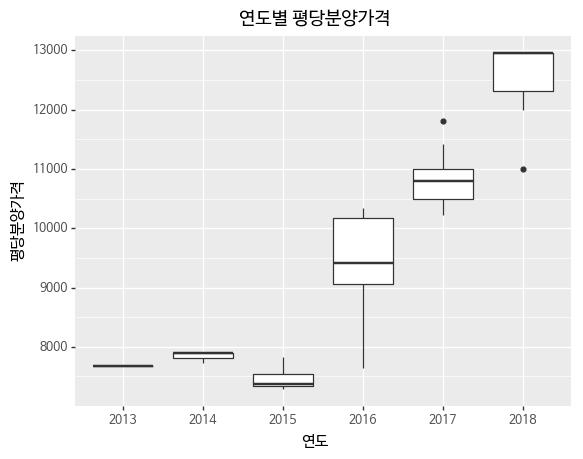

<ggplot: (193906079429)>

In [107]:
df_2013_2018_jeju = df_2013_2018.loc[df_2013_2018['지역명'] == '제주']
(ggplot(df_2013_2018_jeju)
    + aes(x='연도',y='평당분양가격')
    + ggtitle('연도별 평당분양가격')
    + geom_boxplot()
    + theme(text=element_text(family='NanumBarunGothic'))
)

C:\ProgramData\Anaconda3\lib\site-packages\plotnine\layer.py:360: UserWarning: stat_boxplot : Removed 17 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


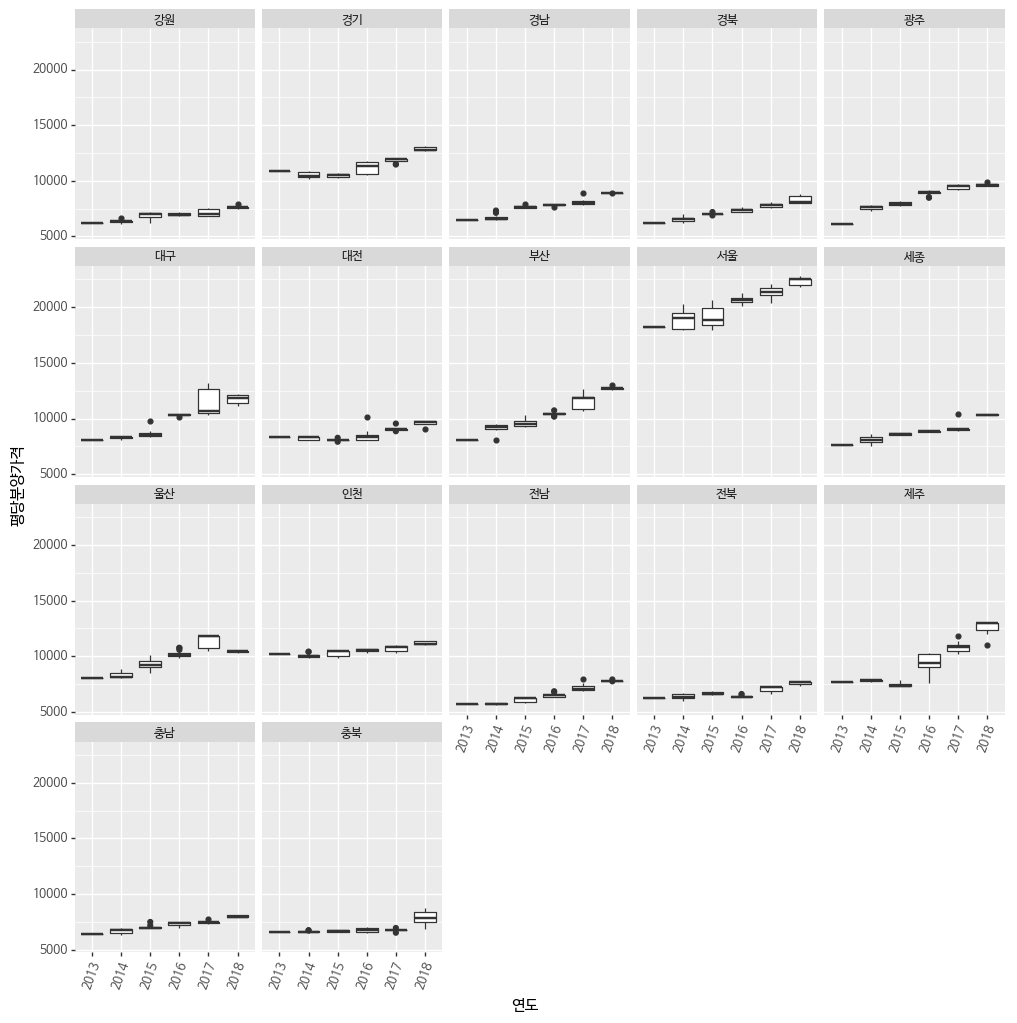

<ggplot: (-9223371842948727338)>

In [108]:
(ggplot(df_2013_2018)
    + aes(x='연도',y='평당분양가격')
    + geom_boxplot()
    + facet_wrap('지역명')
    + theme(text=element_text(family='NanumBarunGothic'),
           axis_text_x = element_text(rotation=70),
           figure_size =(12,12))
)